In [27]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.naive_bayes
import sklearn.ensemble as ske
import sklearn.neighbors
import sklearn.pipeline
import sklearn.linear_model
import joblib
from sklearn import preprocessing
from sklearn import tree, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import sys
import sqlite3
import importlib
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Activation, Flatten, Input, Multiply, Dropout, GlobalMaxPooling1D, GlobalAveragePooling1D, AveragePooling1D
from keras.models import Sequential, Model #for keras sequential model
from keras import optimizers

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
!pip install gdown
!gdown 1stVX2-APaiH9XvXhVpySMkRmnLqsSCLM

Downloading...
From (uriginal): https://drive.google.com/uc?id=1stVX2-APaiH9XvXhVpySMkRmnLqsSCLM
From (redirected): https://drive.google.com/uc?id=1stVX2-APaiH9XvXhVpySMkRmnLqsSCLM&confirm=t&uuid=1f444119-7c55-4e93-8b74-a90f3934a1fe
To: /kaggle/working/wild.pickle
100%|███████████████████████████████████████| 3.87G/3.87G [00:28<00:00, 136MB/s]


In [4]:
df_wild = pd.read_pickle('wild.pickle')

In [5]:
MAX_LENGTH = int(1e6)
prev_size = len(df_wild)
df_wild = df_wild[df_wild['generic_fileSize'] <= MAX_LENGTH]
print("considering samples with size less than {} bytes, {} ----> {}".format(MAX_LENGTH, prev_size, len(df_wild)))

considering samples with size less than 1000000 bytes, 50724 ----> 37354


In [6]:
print(df_wild.shape)

(37354, 56555)


In [7]:
df_wild.head()

,sample_sha1,benign,malicious,packed,unpacked_sample_sha1,unpacked_sample_id,packer_name,imp_setupremovefilelogentrya,imp_vardeccmp,imp_setdlgitemint,...,opcode_xor sub mov,opcode_xor sub mov add,opcode_xor test,opcode_xor test je,opcode_xor xor,opcode_xor xor mov,opcode_xor xor pop,opcode_xor xor pop mov,opcode_xor xor xor,opcode_xor xor xor pop
1,a2aac23e17be570c647fd22080e05b0e58449565,True,False,True,-1,-1,none,False,False,False,...,0.000022,0.0,0.000088,0.000084,0.000070,0.000066,0.000028,0.0,0.000053,0.0
2,c3aa534bbd20f3a3dd8e7a457f625291af9d0fe4,False,True,True,-1,-1,none,False,False,False,...,0.000000,0.0,0.000000,0.000000,0.000309,0.000000,0.000000,0.0,0.000331,0.0
10,15cb9eab6b0f0ccd718a9235f07046dff100789f,False,True,True,-1,-1,none,False,False,False,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
12,8792cf08950abada1572b47948e86c9fce26c01a,True,False,True,-1,-1,none,False,False,False,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
13,353a955ae9919f7b639d74394e3c1149f0189362,True,False,True,-1,-1,none,False,False,False,...,0.000000,0.0,0.000204,0.000190,0.000066,0.000091,0.000000,0.0,0.000000,0.0


In [8]:
#Chọn ngẫu nhiên 3,000 mẫu
df = df_wild.sample(n=1000, random_state=102)

In [9]:
# Loại bỏ các lables không cần thiết
df = df.drop(['sample_sha1','unpacked_sample_sha1','unpacked_sample_id'], axis=1)
df = df.drop(['benign_vt','malicious_vt'], axis=1)
df = df.drop(['benign','packer_name','source','similarity','most_similar_sha1','unpacked_similarity'], axis=1)

In [10]:
#Loại bỏ một số cột dạng string không thể xử lý
string_columns = df.select_dtypes(include=['object']).columns
df = df.drop(string_columns, axis=1)

In [11]:
df.head()

,malicious,packed,imp_setupremovefilelogentrya,imp_vardeccmp,imp_setdlgitemint,imp_?append@?$basic_string@du?$char_traits@d@std@@v?$allocator@d@2@@std@@qaeaav12@abv12@ii@z,imp_zwwritefile,imp_glstencilop,imp_comparelinkinforeferents,imp__setmbcp,...,opcode_xor sub mov,opcode_xor sub mov add,opcode_xor test,opcode_xor test je,opcode_xor xor,opcode_xor xor mov,opcode_xor xor pop,opcode_xor xor pop mov,opcode_xor xor xor,opcode_xor xor xor pop
32148,False,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000187,0.000198,0.0,0.0,0.0,0.0,0.0,0.0
210953,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50313,False,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
200288,True,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
49579,True,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
print(df.shape)

(1000, 56524)


In [13]:
# Parameters
max_features = 56525

In [14]:
label = df['malicious'].values
train = df.drop(['malicious','packed'], axis=1)
train = train.values.reshape(train.shape[0], train.shape[1], 1)

x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.1667, random_state=102)

In [15]:
n_timesteps, n_features = x_train.shape[1], x_train.shape[2]

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(833, 56522, 1)
(833,)
(167, 56522, 1)
(167,)


In [17]:
def Cnn():
    model = Sequential()
#     model.add(Embedding(max_features, 128))
    model.add(Conv1D(128, 3, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Conv1D(128, 3, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(256, 3, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Conv1D(256, 3, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(AveragePooling1D(3))
    model.add(Conv1D(512, 3, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Conv1D(512, 3, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.35))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [18]:
CNN_model = Cnn()
#print the model summary
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 56520, 128)        512       
                                                                 
 conv1d_1 (Conv1D)           (None, 56518, 128)        49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18839, 128)       0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 18837, 256)        98560     
                                                                 
 conv1d_3 (Conv1D)           (None, 18835, 256)        196864    
                                                                 
 average_pooling1d (AverageP  (None, 6278, 256)        0         
 ooling1D)                                              

Epoch 1/20
14/14 - 936s - loss: 10155101.0000 - accuracy: 0.6038 - val_loss: 142554.3281 - val_accuracy: 0.5928 - 936s/epoch - 67s/step
Epoch 2/20
14/14 - 914s - loss: 433247.0625 - accuracy: 0.6519 - val_loss: 251465.2188 - val_accuracy: 0.6946 - 914s/epoch - 65s/step
Epoch 3/20
14/14 - 928s - loss: 143287.4375 - accuracy: 0.6507 - val_loss: 10537.3066 - val_accuracy: 0.6946 - 928s/epoch - 66s/step
Epoch 4/20
14/14 - 922s - loss: 65442.7031 - accuracy: 0.6495 - val_loss: 38626.1484 - val_accuracy: 0.6946 - 922s/epoch - 66s/step
Epoch 5/20
14/14 - 915s - loss: 32434.5508 - accuracy: 0.6759 - val_loss: 27575.6758 - val_accuracy: 0.5868 - 915s/epoch - 65s/step
Epoch 6/20
14/14 - 921s - loss: 28141.8301 - accuracy: 0.6303 - val_loss: 22107.7578 - val_accuracy: 0.5868 - 921s/epoch - 66s/step
Epoch 7/20
14/14 - 924s - loss: 20631.0254 - accuracy: 0.6831 - val_loss: 6564.5532 - val_accuracy: 0.5928 - 924s/epoch - 66s/step
Epoch 8/20
14/14 - 938s - loss: 15146.1416 - accuracy: 0.6122 - val_lo

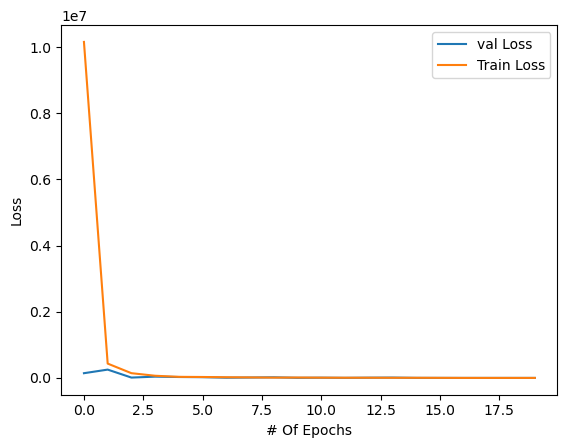

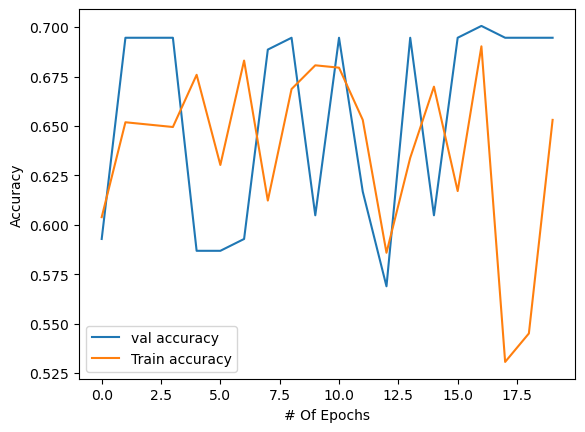

In [19]:
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')
history_cnn = CNN_model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test,y_test), verbose=2)

#for plotting losses curve
loss_training = history_cnn.history['loss']
loss_test = history_cnn.history['val_loss']

#for plotting accyracies curve
accuracy_training = history_cnn.history['accuracy']
accuracy_test = history_cnn.history['val_accuracy']

loss_training = history_cnn.history['loss']
loss_test = history_cnn.history['val_loss']

accuracy_training = history_cnn.history['accuracy']
accuracy_test = history_cnn.history['val_accuracy']

#for Plotting
plt.plot(loss_test)
plt.plot(loss_training)

#set the titles of losses plot
plt.xlabel("# Of Epochs")
plt.ylabel("Loss")
plt.legend(['val Loss', 'Train Loss'])
plt.show()

#set the titles of accuracies plot
plt.plot(accuracy_test)
plt.plot(accuracy_training)
plt.xlabel("# Of Epochs")
plt.ylabel("Accuracy")
plt.legend(['val accuracy', 'Train accuracy'])
plt.show()

In [20]:
#for plotting the confusin matrix
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    #to show the confusion matrix plot
    fig = plt.figure(figsize=figsize)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    #set fontsize and style of confusion matrix
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)

    #set the titles of the confusion matrix
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
#calculate and print the validation accuracy
scores = CNN_model.evaluate(x_train, y_train)
print('Final validation accuraccy: ', scores[1])

27/27 [==============================] - 277s 10s/step - loss: 57.2855 - accuracy: 0.7515
Final validation accuraccy:  0.7515006065368652


In [23]:
#calculate and print the testing accuracy
# x_test, y_test = next(test)
scores_test = CNN_model.evaluate(x_test, y_test)
print('Final testing accuraccy: ', scores_test[1])

6/6 [==============================] - 55s 9s/step - loss: 38.4855 - accuracy: 0.6946
Final testing accuraccy:  0.6946107745170593


In [39]:
# #make the model prediction
# predict_x = CNN_model.predict(x_test)
# y_pred = np.argmax(predict_x)
# y_test = np.argmax(y_test)

In [38]:
# #print the confusion matrix of baseline model
# c_matrix = metrics.confusion_matrix(pd.DataFrame(y_test,columns=y_test.columns), pd.DataFrame(y_pred,columns=y_pred.columns))
# class_names= test.class_indices.keys()
# confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

In [ ]:
# #print classification report of the baseline model
# print('testing report :\n',metrics.classification_report(y_test, y_pred))